In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from xgboost import XGBClassifier


In [30]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [31]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [32]:
print(df['Marital Status'].unique())
print(df['Vehicle Size'].unique())
print(df['EmploymentStatus'].unique())
print(df['Sales Channel'].unique())
print(df['Renew Offer Type'].unique())

['Married' 'Single' 'Divorced']
['Medsize' 'Small' 'Large']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['Agent' 'Call Center' 'Web' 'Branch']
['Offer1' 'Offer3' 'Offer2' 'Offer4']


In [33]:
np.mean(df['Customer Lifetime Value'])

8004.9404749870755

In [34]:
new_df = df[df['Customer Lifetime Value'] > 8000]

In [35]:
# Define a lambda function to replace 'Yes' with 1 and 'No' with 0
replace_lambda = lambda x: 1 if x == 'Yes' else 0
replace_Marital_Status = lambda x: 1 if x == 'Married' else (2 if x == 'Single' else 3)
replace_Renew_Offer_Type = lambda x: 1 if x == 'Offer1' else (2 if x == 'Offer2' else 3)
replace_Sales_Channel = lambda x: 1 if x == 'Agent' else (2 if x == 'Call Center' else (3 if x == 'Web' else 4))
replace_Vehicle_Size = lambda x: 1 if x == 'Small' else (2 if x == 'Medsize' else 3)
replace_Employment = lambda x: 1 if x == 'Employed' else (2 if x == 'Unemployed' else (3 if x == 'Medical Leave' else (4 if x == 'Disabled' else 5)))

# Apply the lambda function to the entire DataFrame
df['Response'] = df['Response'].apply(replace_lambda)
new_df['Response'] = new_df['Response'].apply(replace_lambda)
df['Marital Status'] = df['Marital Status'].apply(replace_Marital_Status)
new_df['Marital Status'] = new_df['Marital Status'].apply(replace_Marital_Status)
df['Vehicle Size'] = df['Vehicle Size'].apply(replace_Vehicle_Size)
new_df['Vehicle Size'] = new_df['Vehicle Size'].apply(replace_Vehicle_Size)
df['EmploymentStatus'] = df['EmploymentStatus'].apply(replace_Employment)                                                          
new_df['EmploymentStatus'] = new_df['EmploymentStatus'].apply(replace_Employment)                                                        
df['Sales Channel'] = df['Sales Channel'].apply(replace_Sales_Channel)
new_df['Sales Channel'] = new_df['Sales Channel'].apply(replace_Sales_Channel)
df['Renew Offer Type'] = df['Renew Offer Type'].apply(replace_Renew_Offer_Type)
new_df['Renew Offer Type'] = new_df['Renew Offer Type'].apply(replace_Renew_Offer_Type)

                                                       
# Print the updated DataFrame
print(df.head())
print(new_df.head())

  Customer       State  Customer Lifetime Value  Response  Coverage Education  \
0  BU79786  Washington              2763.519279         0     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903         0  Extended  Bachelor   
2  AI49188      Nevada             12887.431650         0   Premium  Bachelor   
3  WW63253  California              7645.861827         0     Basic  Bachelor   
4  HB64268  Washington              2813.692575         0     Basic  Bachelor   

  Effective To Date  EmploymentStatus Gender  Income  ...  \
0           2/24/11                 1      F   56274  ...   
1           1/31/11                 2      F       0  ...   
2           2/19/11                 1      F   48767  ...   
3           1/20/11                 2      M       0  ...   
4            2/3/11                 1      M   43836  ...   

  Months Since Policy Inception  Number of Open Complaints  \
0                             5                          0   
1                     

C:\Users\Christos Michailidis\AppData\Local\Temp\ipykernel_8916\3430633251.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Response'] = new_df['Response'].apply(replace_lambda)
C:\Users\Christos Michailidis\AppData\Local\Temp\ipykernel_8916\3430633251.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Marital Status'] = new_df['Marital Status'].apply(replace_Marital_Status)
C:\Users\Christos Michailidis\AppData\Local\Temp\ipykernel_8916\3430633251.py:15: SettingWithCopyWarning: 
A val

In [36]:
# Separate the target variable (y) and features (X)
significant_cols = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                    'Months Since Policy Inception','Number of Policies','Total Claim Amount','Marital Status',
                    'Renew Offer Type','Sales Channel','Vehicle Size']
y = df['Response']
X = df[significant_cols]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,Marital Status,Renew Offer Type,Sales Channel,Vehicle Size
0,2763.519279,56274,69,32,5,1,384.811147,1,1,1,2
1,6979.535903,0,94,13,42,8,1131.464935,2,3,1,2
2,12887.431650,48767,108,18,38,2,566.472247,1,1,1,2
3,7645.861827,0,106,18,65,7,529.881344,1,1,2,2
4,2813.692575,43836,73,12,44,1,138.130879,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,2,198.234764,1,2,3,2
9130,3096.511217,21604,79,14,28,1,379.200000,3,1,4,2
9131,8163.890428,0,85,9,37,2,790.784983,2,1,4,2
9132,7524.442436,21941,96,34,3,3,691.200000,1,3,4,3


### LOGISTIC REGRESSION

In [38]:


# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy Score:", accuracy)
print("\nPrecision Score:", precision)
print("\nRecall Score:", recall)


Confusion Matrix:
[[2332    0]
 [ 409    0]]

Accuracy Score: 0.8507843852608536

Precision Score: 0.0

Recall Score: 0.0


C:\Users\Christos Michailidis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Christos Michailidis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Christos Michailidis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined a

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [40]:
# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model on the resampled data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy Score:", accuracy)
print("\nPrecision Score:", precision)
print("\nRecall Score:", recall)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[2271   61]
 [  10  399]]

Accuracy Score: 0.9740970448741335

Precision Score: 0.8673913043478261

Recall Score: 0.9755501222493888

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2332
           1       0.87      0.98      0.92       409

    accuracy                           0.97      2741
   macro avg       0.93      0.97      0.95      2741
weighted avg       0.98      0.97      0.97      2741



In [41]:
# Separate the features (X) and the label (y)
X = df[significant_cols]
y = df['Response']

# Assuming your features need to be scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model on the resampled data
xgb_model.fit(X_resampled, y_resampled)

# Create a new DataFrame with the features of the first row for prediction
new_data = {'Customer Lifetime Value': [df['Customer Lifetime Value'].iloc[0]],
            'Income': [df['Income'].iloc[0]],
            'Monthly Premium Auto': [df['Monthly Premium Auto'].iloc[0]],
            'Months Since Last Claim': [df['Months Since Last Claim'].iloc[0]],
            'Months Since Policy Inception': [df['Months Since Policy Inception'].iloc[0]],
            'Number of Policies': [df['Number of Policies'].iloc[0]],
            'Total Claim Amount': [df['Total Claim Amount'].iloc[0]],
            'Marital Status': [df['Marital Status'].iloc[0]],
            'Renew Offer Type': [df['Renew Offer Type'].iloc[0]],
            'Sales Channel': [df['Sales Channel'].iloc[0]],
            'Vehicle Size': [df['Vehicle Size'].iloc[0]]}
new_df1 = pd.DataFrame(new_data)



# Scale the features of the new data
new_data_scaled = scaler.transform(new_df1)

# Make predictions for the new data
prediction = xgb_model.predict(new_data_scaled)

# Print the prediction
print("Predicted Response:", prediction[0])

Predicted Response: 0


In [42]:
new_df['Sales Channel'].unique()

array([1, 3, 4, 2], dtype=int64)

In [43]:
count_ones = (new_df['Sales Channel'] != 1).sum()

print("Count of 1's in the 'Agent' column:", count_ones)

Count of 1's in the 'Agent' column: 1889


In [44]:
count_no = ((new_df['Sales Channel'] != 1) & (new_df['Response'] == 0))
df_new22 = new_df[count_no]
print(len(df_new22))

1655


In [45]:
new_df22 = new_df[count_no]
new_df22['Sales Channel'] = df['Sales Channel'].replace([2, 3, 4], 1)
print(len(new_df22))
print(df.columns)

1655
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


C:\Users\Christos Michailidis\AppData\Local\Temp\ipykernel_8916\901841710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df22['Sales Channel'] = df['Sales Channel'].replace([2, 3, 4], 1)


In [46]:
new_data_scaled1 = scaler.transform(df_new22[significant_cols])
new_data_scaled2 = scaler.transform(new_df22[significant_cols])

count_scaled1 = 0
count_scaled2 = 0

predictions = xgb_model.predict(new_data_scaled1)
for i, prediction in enumerate(predictions):
    print(f"Predicted Response for record {i}: {prediction}")
    if prediction == 1:
        count_scaled1 += 1

predictions = xgb_model.predict(new_data_scaled2)
for i, prediction in enumerate(predictions):
    print(f"Predicted Response for record {i}: {prediction}")
    if prediction == 1:
        count_scaled2 += 1
    
print("Σύνολο πελατών που ανταποκρίθηκαν : ", count_scaled1)
print("Σύνολο πελατών που ανταποκρίθηκαν έπειτα από αλλαγή του Sales Channel σε Agent : ", count_scaled2)

Predicted Response for record 0: 0
Predicted Response for record 1: 0
Predicted Response for record 2: 0
Predicted Response for record 3: 0
Predicted Response for record 4: 0
Predicted Response for record 5: 0
Predicted Response for record 6: 0
Predicted Response for record 7: 0
Predicted Response for record 8: 0
Predicted Response for record 9: 0
Predicted Response for record 10: 0
Predicted Response for record 11: 0
Predicted Response for record 12: 0
Predicted Response for record 13: 0
Predicted Response for record 14: 0
Predicted Response for record 15: 0
Predicted Response for record 16: 0
Predicted Response for record 17: 0
Predicted Response for record 18: 0
Predicted Response for record 19: 0
Predicted Response for record 20: 0
Predicted Response for record 21: 0
Predicted Response for record 22: 0
Predicted Response for record 23: 0
Predicted Response for record 24: 0
Predicted Response for record 25: 0
Predicted Response for record 26: 0
Predicted Response for record 27: 0
Pr

In [47]:
indices = np.where(predictions == 1)[0]
print("Εγγραφές που προβλέφθηκαν ότι θα ανταποκριθούν:", indices)
print("Συνολικό όφελος Τράπεζας : ",df_new22.iloc[indices]['Customer Lifetime Value'].sum())


Εγγραφές που προβλέφθηκαν ότι θα ανταποκριθούν: [ 290  322  585  659  883 1075 1131 1382 1516]
Συνολικό όφελος Τράπεζας :  132404.65348799998


In [48]:
count_no2 = ((df['Sales Channel'] != 1) & (df['Response'] == 0))
df_count_no2 = df[count_no2]
print(len(df_count_no2))


new_count_no2 = df[count_no2]
new_count_no2['Sales Channel'] = df['Sales Channel'].replace([2, 3, 4], 1)
print(len(new_count_no2))

5015
5015


C:\Users\Christos Michailidis\AppData\Local\Temp\ipykernel_8916\2042020795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_count_no2['Sales Channel'] = df['Sales Channel'].replace([2, 3, 4], 1)


In [49]:
new_data_scaled3 = scaler.transform(df_count_no2[significant_cols])
new_data_scaled4 = scaler.transform(new_count_no2[significant_cols])

count_scaled3 = 0
count_scaled4 = 0

predictions = xgb_model.predict(new_data_scaled3)
for i, prediction in enumerate(predictions):
    print(f"Predicted Response for record {i}: {prediction}")
    if prediction == 1:
        count_scaled3 += 1
        
predictions = xgb_model.predict(new_data_scaled4)
for i, prediction in enumerate(predictions):
    print(f"Predicted Response for record {i}: {prediction}")
    if prediction == 1:
        count_scaled4 += 1


print()
print("Σύνολο πελατών που ανταποκρίθηκαν : ", count_scaled3)
print("Σύνολο πελατών που ανταποκρίθηκαν έπειτα από αλλαγή του Sales Channel σε Agent : ", count_scaled4)

indices2 = np.where(predictions == 1)[0]
print()
print("Εγγραφές που προβλέφθηκαν ότι θα ανταποκριθούν:", indices2)
print()
print("Συνολικό όφελος Τράπεζας : ",df_count_no2.iloc[indices2]['Customer Lifetime Value'].sum())


Predicted Response for record 0: 0
Predicted Response for record 1: 0
Predicted Response for record 2: 0
Predicted Response for record 3: 0
Predicted Response for record 4: 0
Predicted Response for record 5: 0
Predicted Response for record 6: 0
Predicted Response for record 7: 0
Predicted Response for record 8: 0
Predicted Response for record 9: 0
Predicted Response for record 10: 0
Predicted Response for record 11: 0
Predicted Response for record 12: 0
Predicted Response for record 13: 0
Predicted Response for record 14: 0
Predicted Response for record 15: 0
Predicted Response for record 16: 0
Predicted Response for record 17: 0
Predicted Response for record 18: 0
Predicted Response for record 19: 0
Predicted Response for record 20: 0
Predicted Response for record 21: 0
Predicted Response for record 22: 0
Predicted Response for record 23: 0
Predicted Response for record 24: 0
Predicted Response for record 25: 0
Predicted Response for record 26: 0
Predicted Response for record 27: 0
Pr

Predicted Response for record 0: 0
Predicted Response for record 1: 0
Predicted Response for record 2: 0
Predicted Response for record 3: 0
Predicted Response for record 4: 0
Predicted Response for record 5: 0
Predicted Response for record 6: 0
Predicted Response for record 7: 0
Predicted Response for record 8: 0
Predicted Response for record 9: 0
Predicted Response for record 10: 0
Predicted Response for record 11: 0
Predicted Response for record 12: 0
Predicted Response for record 13: 0
Predicted Response for record 14: 0
Predicted Response for record 15: 0
Predicted Response for record 16: 0
Predicted Response for record 17: 0
Predicted Response for record 18: 0
Predicted Response for record 19: 0
Predicted Response for record 20: 0
Predicted Response for record 21: 0
Predicted Response for record 22: 0
Predicted Response for record 23: 0
Predicted Response for record 24: 0
Predicted Response for record 25: 0
Predicted Response for record 26: 0
Predicted Response for record 27: 0
Pr


Εγγραφές που προβλέφθηκαν ότι θα ανταποκριθούν: [  31  285  473  551  640  795  846  851  957 1137 1759 1869 1890 1948
 1996 1999 2032 2142 2187 2292 2303 2490 2586 2667 2675 2735 2754 2909
 2935 3215 3313 3323 3342 3375 3379 3446 3537 3615 3744 3963 3991 4039
 4043 4195 4281 4573 4616 4680 4682 4804 4870]

Συνολικό όφελος Τράπεζας :  341976.799543


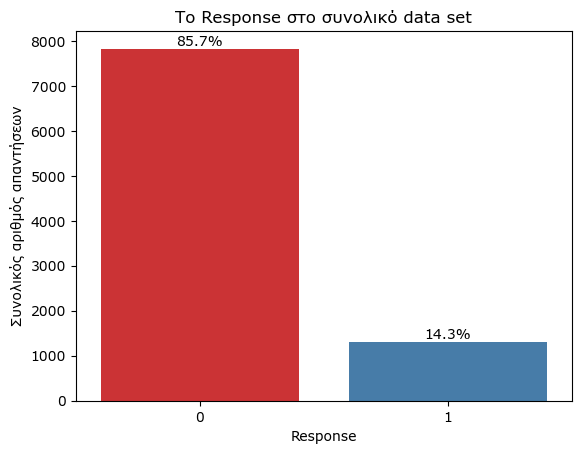

In [50]:
# Δημιουργία του countplot
ax = sns.countplot(x='Response', data=df, palette='Set1', linewidth=0.5)

# Υπολογισμός των ποσοστών ανά κατηγορία
total_responses = len(df['Response'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

# Προσαρμογή του διαγράμματος
plt.ylabel('Συνολικός αριθμός απαντήσεων')
plt.title('Το Response στο συνολικό data set')
plt.savefig('response_Data.png')

# Εμφάνιση του διαγράμματος
plt.show()


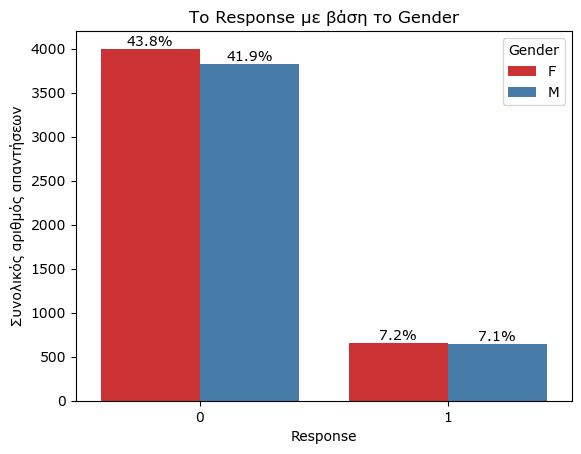

In [51]:
# Δημιουργία του countplot
ax = sns.countplot(x='Response',hue = 'Gender', data=df, palette='Set1', linewidth=0.5)

# Υπολογισμός των ποσοστών ανά κατηγορία
total_responses = len(df['Response'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

# Προσαρμογή του διαγράμματος
plt.ylabel('Συνολικός αριθμός απαντήσεων')
plt.title('Το Response με βάση το Gender')

# Εμφάνιση του διαγράμματος
plt.show()

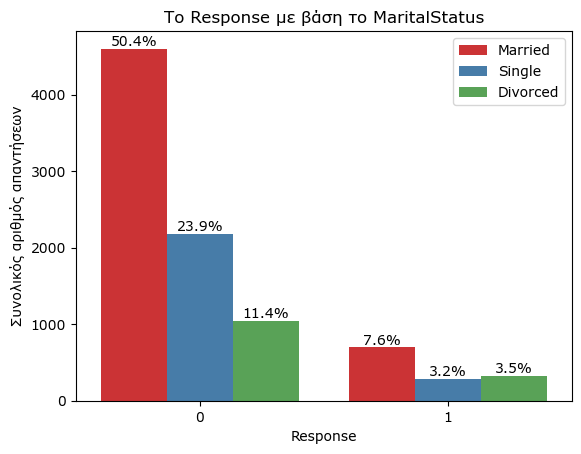

In [52]:
# Δημιουργία του countplot
ax = sns.countplot(x='Response', hue='Marital Status', data=df, palette='Set1', linewidth=0.5)

# Υπολογισμός των ποσοστών ανά κατηγορία
total_responses = len(df['Response'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

# Προσαρμογή του διαγράμματος
plt.ylabel('Συνολικός αριθμός απαντήσεων')
plt.title('Το Response με βάση το MaritalStatus')

# Ορισμός των νέων labels για το legend
new_labels = ['Married', 'Single', 'Divorced']
ax.legend(labels=new_labels)
plt.savefig('marital status.png')

# Εμφάνιση του διαγράμματος
plt.show()


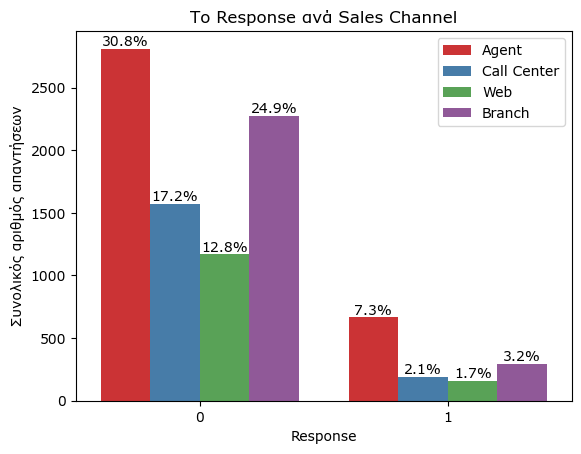

In [53]:
# Δημιουργία του countplot
ax = sns.countplot(x='Response', hue='Sales Channel', data=df, palette='Set1', linewidth=0.5)

# Υπολογισμός των ποσοστών ανά κατηγορία
total_responses = len(df['Response'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

# Προσαρμογή του διαγράμματος
plt.ylabel('Συνολικός αριθμός απαντήσεων')
plt.title('Το Response ανά Sales Channel')

# Ορισμός των νέων labels για το legend
new_labels = ['Agent', 'Call Center', 'Web', 'Branch']
ax.legend(labels=new_labels)
plt.savefig('sales_channel.png')

# Εμφάνιση του διαγράμματος
plt.show()

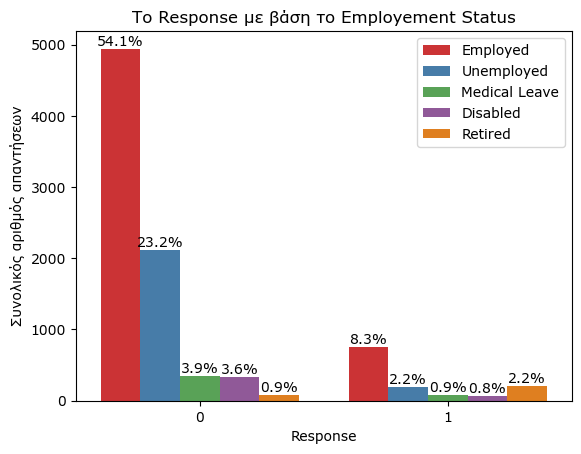

In [54]:
# Δημιουργία του countplot
ax = sns.countplot(x='Response', hue='EmploymentStatus', data=df, palette='Set1', linewidth=0.5)

# Υπολογισμός των ποσοστών ανά κατηγορία
total_responses = len(df['Response'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_responses)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

# Προσαρμογή του διαγράμματος
plt.ylabel('Συνολικός αριθμός απαντήσεων')
plt.title('Το Response με βάση το Employement Status')

# Ορισμός των νέων labels για το legend
new_labels = ['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired']
ax.legend(labels=new_labels)
plt.savefig('employment_status.png')

# Εμφάνιση του διαγράμματος
plt.show()

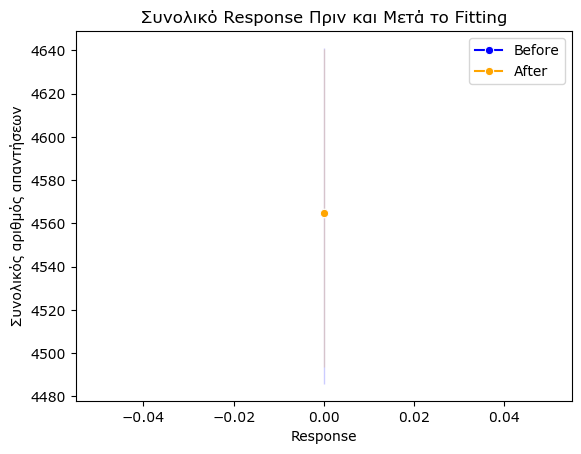

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Υποθέτουμε ότι έχετε τα DataFrame df_count_no2 και new_count_no2 με τις αντίστοιχες στήλες 'Response'

# Δημιουργία του line plot για το συνολικό Response πριν το fitting
sns.lineplot(x='Response', y=df_count_no2['Response'].index, data=df_count_no2, marker='o', color='blue', label='Before')

# Δημιουργία του line plot για το συνολικό Response μετά το fitting
sns.lineplot(x='Response', y=new_count_no2['Response'].index, data=new_count_no2, marker='o', color='orange', label='After')

# Προσαρμογή του διαγράμματος
plt.ylabel('Συνολικός αριθμός απαντήσεων')
plt.title('Συνολικό Response Πριν και Μετά το Fitting')
plt.legend()

# Εμφάνιση του διαγράμματος
plt.show()


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, precision_score

# Assuming you have already loaded and preprocessed your dataset as in your code

# Separate the features (X) and the label (y)
X = df[significant_cols]
y = df['Response']

# Assuming your features need to be scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define precision as the scoring metric
scorer = make_scorer(precision_score)

# Perform 5-fold cross-validation
cv_results = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring=scorer)

# Print the results
print("Cross-Validation Precision Scores:", cv_results)
print("Average Precision Score:", np.mean(cv_results))


Cross-Validation Precision Scores: [0.98800505 0.99113924 0.97996243 0.98180678 0.98119122]
Average Precision Score: 0.9844209437090216


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import make_scorer, precision_score

# Assuming you have already loaded and preprocessed your dataset as in your code

# Separate the features (X) and the label (y)
X = df[significant_cols]
y = df['Response']

# Assuming your features need to be scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply RandomOverSampler to the entire dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define precision as the scoring metric
scorer = make_scorer(precision_score)

# Perform 5-fold cross-validation
cv_results = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring=scorer)

# Print the results
print("Cross-Validation Precision Scores:", cv_results)
print("Average Precision Score:", np.mean(cv_results))


Cross-Validation Precision Scores: [0.98427673 0.99051233 0.9824231  0.98057644 0.9830402 ]
Average Precision Score: 0.9841657613401088
